<a href="https://colab.research.google.com/github/AccomplishedCode/NYC_Target_Demographics/blob/main/Demographic_Analysis(July_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demographic Analysis on Filtered Target Locations

## What data we will be using

Here we will load the csv files I've cleaned from the shared drive folder. 
There will be 6 files that we will analyze, 3 of them containing patterns for Target locations specifically for the months of July 2019/2020 and March 2021. The other 3 contain neighborhood patterns, which are for the parent CBGs of our target locations. The idea here is to see how many  of the visitors of that CBG go to Target. 

After that, we don't need to focus much on the neighborhood patterns. We can focus on demographic patterns on our 3 Target POI csv files. 

Fortunately, the Safegraph people have a library of functions which automatically does the heavy lifting for us. They also provide a way to directly load the open census data from their public GDrive, which I will be doing here as well. But we also have that data on our drive folder if you feel like diving deeper. 

## Beginning the Data Import 

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# special libraries to allow file access
from google.colab import drive as mountGoogleDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
your_name = "Parth" # << You should edit this

################################
print(f"Hello {your_name}, you will be asked to authenticate twice, once for Google File Stream and once for Google Cloud SDK.\nYou may have to click on two separate links, and copy/paste two codes, serially.")
################################
# These commands allow the notebook to read your data from your GoogleDrive
mountGoogleDrive.mount('/content/mountedDrive')
print(f"Congrats {your_name}, you mounted your google drive!")
################################
# These commands allow you to read directly from SafeGraph's public GoogleDrive containing Census Data
auth.authenticate_user()  # Authenticate and create the PyDrive client. 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("You are fully authenticated!".format(your_name))

Hello Parth, you will be asked to authenticate twice, once for Google File Stream and once for Google Cloud SDK.
You may have to click on two separate links, and copy/paste two codes, serially.
Mounted at /content/mountedDrive
Congrats Parth, you mounted your google drive!
You are fully authenticated!


In [ ]:
i_want_to_use_my_own_patterns_data = True
patterns_directory_drive = "/content/mountedDrive/My Drive/Safegraph_Data/filtered_poi_data/July_2020"  # path to monthly patterns data

# ~~~~~~
if(i_want_to_use_my_own_patterns_data):
  print(f"OK, {your_name}! We will read patterns data from: {patterns_directory_drive}\nTesting that drive is mounted and we can find the data...")
  test = pd.read_csv(os.path.join(patterns_directory_drive, 'home_panel_summary.csv'))
  print("SUCCESS! We found your Patterns data!")
  print("Census Data will be read from SafeGraph's GDrive object: {0}".format(drive))
else:
  print(f"Great, {your_name}! We will use the Default Notebook Data located in GDrive object: {drive}")
  patterns_directory_drive=None

OK, Parth! We will read patterns data from: /content/mountedDrive/My Drive/Safegraph_Data/filtered_poi_data/July_2020
Testing that drive is mounted and we can find the data...
SUCCESS! We found your Patterns data!
Census Data will be read from SafeGraph's GDrive object: <pydrive.drive.GoogleDrive object at 0x7f729887c490>


In [ ]:
july_20_path= patterns_directory_drive+ '/target_pois_07_20.csv'
jul_20= pd.read_csv(july_20_path)
jul_20

,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,5702,3889,"[114,114,129,136,132,135,185,159,166,185,216,1...",3.604711e+11,"{""360471070001"":37,""360471058044"":24,""36047122...","{""360471070001"":45,""360471058044"":23,""36047122...","{""360470355002"":10,""340170127005"":6,""360471070...","{""US"":3727}",4326.0,28.0,"{""<5"":82,""5-20"":1804,""21-60"":2676,""61-240"":849...","{""BJ's Wholesale Club"":11,""The Home Depot"":7,""...","{""Dunkin'"":32,""BJ's Wholesale Club"":30,""Dollar...","[82,78,78,82,76,91,115,188,404,592,708,821,965...","{""Monday"":919,""Tuesday"":861,""Wednesday"":720,""T...","{""android"":2050,""ios"":1837}"
1,sg:fd4bf1e165794ab99140ca0bb2d5e022,Target,400 Grand St,New York,NY,10002,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1195,699,"[42,31,27,37,23,37,22,48,29,29,33,52,39,42,45,...",3.606100e+11,"{""360610002024"":19,""360610002022"":19,""36061000...","{""360610022014"":20,""360610006002"":17,""36061000...","{""360610014021"":6,""360610028004"":4,""3608101850...","{""US"":651}",873.0,22.0,"{""<5"":22,""5-20"":489,""21-60"":525,""61-240"":93,"">...","{""Fine Fare Supermarkets"":8}","{""Dunkin'"":23,""Fine Fare Supermarkets"":20,""Rit...","[16,18,17,16,15,26,34,46,94,113,154,203,185,18...","{""Monday"":213,""Tuesday"":196,""Wednesday"":127,""T...","{""android"":391,""ios"":308}"
2,sg:268ea7486c334ad8ad2d0e4e08f3ff9e,Target,445 Albee Sq,Brooklyn,NY,11201,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,700,481,"[16,15,16,20,19,17,13,24,24,25,16,28,19,16,23,...",3.604700e+11,"{""360470015002"":9,""360470015003"":7,""3604700370...","{""360470015003"":12,""360810998012"":8,""360470037...","{""360470015003"":11,""360470430003"":7,""360470031...","{""US"":445,""CA"":4}",5931.0,24.0,"{""<5"":12,""5-20"":279,""21-60"":277,""61-240"":93,"">...","{""MAC Cosmetics"":10,""Crown Fried Chicken"":8,""J...","{""Dunkin'"":26,""CVS"":17,""Starbucks"":15,""Baskin ...","[7,7,7,4,8,20,38,50,76,101,109,107,113,113,101...","{""Monday"":116,""Tuesday"":112,""Wednesday"":90,""Th...","{""android"":322,""ios"":162}"
3,sg:c7222887b3834a58a6bc40c168cdb38a,Target,512 2nd Ave,New York,NY,10016,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,517,298,"[22,23,16,15,14,12,17,22,18,15,16,19,18,15,21,...",3.606101e+11,"{""360610066008"":8,""360610066007"":7,""3606100660...","{""360610062001"":14,""360610066009"":9,""360610064...","{""360610014012"":9,""360610062001"":8,""3606100660...","{""US"":270}",7885.0,20.0,"{""<5"":15,""5-20"":244,""21-60"":116,""61-240"":76,"">...","{""McDonald's"":13,""Haru Sushi"":12,""GameStop"":7,...","{""Dunkin'"":24,""Starbucks"":23,""Baskin Robbins"":...","[11,10,9,11,13,17,32,33,37,47,72,90,92,113,118...","{""Monday"":96,""Tuesday"":93,""Wednesday"":62,""Thur...","{""android"":182,""ios"":118}"
4,sg:507b345e2e2445f5b4edaf6fa1b01b0d,Target,517 E 117th St Ste 201,New York,NY,10035,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,245,192,"[8,6,13,13,7,2,6,8,10,6,6,10,6,3,5,4,9,8,10,7,...",3.606102e+11,"{""360610192003"":7,""090093527021"":5,""3606101640...","{""360610198001"":7,""360610180004"":7,""3606101920...","{""360470228003"":6,""360610172001"":4,""3606101920...","{""US"":186}",2031.0,13.0,"{""<5"":16,""5-20"":157,""21-60"":47,""61-240"":17,"">2...",

In [ ]:
jul_20.shape

(14, 26)

In [ ]:
sgpid_list= ['sg:f189f91419974d03a20257132d73da58','sg:1cca2eb93802407a8a872a78db5fdf71','sg:eb96ed984b274a57ae29762d73738d99','sg:fd4bf1e165794ab99140ca0bb2d5e022','sg:4c2a6e828527407d863fc641eaa20ac3','sg:084ab2c726784ab490b72144d44d4ee8','sg:268ea7486c334ad8ad2d0e4e08f3ff9e','sg:5fe86b949ad24e79b59672ae1b6d148d']

jul_20= jul_20.loc[jul_20.safegraph_place_id.isin(sgpid_list)]
jul_20

,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,5702,3889,"[114,114,129,136,132,135,185,159,166,185,216,1...",3.604711e+11,"{""360471070001"":37,""360471058044"":24,""36047122...","{""360471070001"":45,""360471058044"":23,""36047122...","{""360470355002"":10,""340170127005"":6,""360471070...","{""US"":3727}",4326.0,28.0,"{""<5"":82,""5-20"":1804,""21-60"":2676,""61-240"":849...","{""BJ's Wholesale Club"":11,""The Home Depot"":7,""...","{""Dunkin'"":32,""BJ's Wholesale Club"":30,""Dollar...","[82,78,78,82,76,91,115,188,404,592,708,821,965...","{""Monday"":919,""Tuesday"":861,""Wednesday"":720,""T...","{""android"":2050,""ios"":1837}"
1,sg:fd4bf1e165794ab99140ca0bb2d5e022,Target,400 Grand St,New York,NY,10002,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1195,699,"[42,31,27,37,23,37,22,48,29,29,33,52,39,42,45,...",3.606100e+11,"{""360610002024"":19,""360610002022"":19,""36061000...","{""360610022014"":20,""360610006002"":17,""36061000...","{""360610014021"":6,""360610028004"":4,""3608101850...","{""US"":651}",873.0,22.0,"{""<5"":22,""5-20"":489,""21-60"":525,""61-240"":93,"">...","{""Fine Fare Supermarkets"":8}","{""Dunkin'"":23,""Fine Fare Supermarkets"":20,""Rit...","[16,18,17,16,15,26,34,46,94,113,154,203,185,18...","{""Monday"":213,""Tuesday"":196,""Wednesday"":127,""T...","{""android"":391,""ios"":308}"
2,sg:268ea7486c334ad8ad2d0e4e08f3ff9e,Target,445 Albee Sq,Brooklyn,NY,11201,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,700,481,"[16,15,16,20,19,17,13,24,24,25,16,28,19,16,23,...",3.604700e+11,"{""360470015002"":9,""360470015003"":7,""3604700370...","{""360470015003"":12,""360810998012"":8,""360470037...","{""360470015003"":11,""360470430003"":7,""360470031...","{""US"":445,""CA"":4}",5931.0,24.0,"{""<5"":12,""5-20"":279,""21-60"":277,""61-240"":93,"">...","{""MAC Cosmetics"":10,""Crown Fried Chicken"":8,""J...","{""Dunkin'"":26,""CVS"":17,""Starbucks"":15,""Baskin ...","[7,7,7,4,8,20,38,50,76,101,109,107,113,113,101...","{""Monday"":116,""Tuesday"":112,""Wednesday"":90,""Th...","{""android"":322,""ios"":162}"
5,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1483,964,"[44,30,33,31,32,40,33,47,40,68,37,52,56,48,58,...",3.604706e+11,"{""360470554001"":31,""360470554002"":27,""36047055...","{""360470554001"":35,""360470554002"":26,""36047055...","{""360470552003"":6,""360470606001"":5,""3604704320...","{""US"":908,""RU"":4}",1680.0,23.0,"{""<5"":22,""5-20"":586,""21-60"":585,""61-240"":186,""...","{""Dunkin'"":8,""Walgreens"":7,""Gulf Oil"":6}","{""Dunkin'"":32,""Rite Aid"":20,""Baskin Robbins"":1...","[59,56,59,56,59,59,64,82,94,146,183,212,266,26...","{""Monday"":281,""Tuesday"":250,""Wednesday"":234,""T...","{""android"":503,""ios"":460}"
6,sg:4c2a6e828527407d863fc641eaa20ac3,Target,6401 18th Ave,Brooklyn,NY,11204,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1112,788,"[19,38,22,23,29,20,27,29,49,38,48,43,46,43,35,...",3.604703e+11,"{""360470252004"":34,""360470252001"":13,""36047025...","{""360470252004"":25,""360470252001"":16,""36047025...","{""360470178002"":5,""360610172001"":4,""3604705180...","{""US"":746,""GE"":4}",1634.0,20.0,"{""<5"":29,""5-20"":535,""21-60"":391,""61-240"":100,""

In [ ]:
jul_20= jul_20.reset_index()

In [ ]:
list(jul_20['street_address'])

['519 Gateway Dr',
 '400 Grand St',
 '445 Albee Sq',
 '1715 E 13th St',
 '6401 18th Ave',
 '255 Greenwich St',
 '1598 Flatbush Ave',
 '112 W 34th St']

In [ ]:
jul_20_branded= jul_20.copy()

jul_20_branded

,index,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,5702,3889,"[114,114,129,136,132,135,185,159,166,185,216,1...",3.604711e+11,"{""360471070001"":37,""360471058044"":24,""36047122...","{""360471070001"":45,""360471058044"":23,""36047122...","{""360470355002"":10,""340170127005"":6,""360471070...","{""US"":3727}",4326.0,28.0,"{""<5"":82,""5-20"":1804,""21-60"":2676,""61-240"":849...","{""BJ's Wholesale Club"":11,""The Home Depot"":7,""...","{""Dunkin'"":32,""BJ's Wholesale Club"":30,""Dollar...","[82,78,78,82,76,91,115,188,404,592,708,821,965...","{""Monday"":919,""Tuesday"":861,""Wednesday"":720,""T...","{""android"":2050,""ios"":1837}"
1,1,sg:fd4bf1e165794ab99140ca0bb2d5e022,Target,400 Grand St,New York,NY,10002,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1195,699,"[42,31,27,37,23,37,22,48,29,29,33,52,39,42,45,...",3.606100e+11,"{""360610002024"":19,""360610002022"":19,""36061000...","{""360610022014"":20,""360610006002"":17,""36061000...","{""360610014021"":6,""360610028004"":4,""3608101850...","{""US"":651}",873.0,22.0,"{""<5"":22,""5-20"":489,""21-60"":525,""61-240"":93,"">...","{""Fine Fare Supermarkets"":8}","{""Dunkin'"":23,""Fine Fare Supermarkets"":20,""Rit...","[16,18,17,16,15,26,34,46,94,113,154,203,185,18...","{""Monday"":213,""Tuesday"":196,""Wednesday"":127,""T...","{""android"":391,""ios"":308}"
2,2,sg:268ea7486c334ad8ad2d0e4e08f3ff9e,Target,445 Albee Sq,Brooklyn,NY,11201,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,700,481,"[16,15,16,20,19,17,13,24,24,25,16,28,19,16,23,...",3.604700e+11,"{""360470015002"":9,""360470015003"":7,""3604700370...","{""360470015003"":12,""360810998012"":8,""360470037...","{""360470015003"":11,""360470430003"":7,""360470031...","{""US"":445,""CA"":4}",5931.0,24.0,"{""<5"":12,""5-20"":279,""21-60"":277,""61-240"":93,"">...","{""MAC Cosmetics"":10,""Crown Fried Chicken"":8,""J...","{""Dunkin'"":26,""CVS"":17,""Starbucks"":15,""Baskin ...","[7,7,7,4,8,20,38,50,76,101,109,107,113,113,101...","{""Monday"":116,""Tuesday"":112,""Wednesday"":90,""Th...","{""android"":322,""ios"":162}"
3,5,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1483,964,"[44,30,33,31,32,40,33,47,40,68,37,52,56,48,58,...",3.604706e+11,"{""360470554001"":31,""360470554002"":27,""36047055...","{""360470554001"":35,""360470554002"":26,""36047055...","{""360470552003"":6,""360470606001"":5,""3604704320...","{""US"":908,""RU"":4}",1680.0,23.0,"{""<5"":22,""5-20"":586,""21-60"":585,""61-240"":186,""...","{""Dunkin'"":8,""Walgreens"":7,""Gulf Oil"":6}","{""Dunkin'"":32,""Rite Aid"":20,""Baskin Robbins"":1...","[59,56,59,56,59,59,64,82,94,146,183,212,266,26...","{""Monday"":281,""Tuesday"":250,""Wednesday"":234,""T...","{""android"":503,""ios"":460}"
4,6,sg:4c2a6e828527407d863fc641eaa20ac3,Target,6401 18th Ave,Brooklyn,NY,11204,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1112,788,"[19,38,22,23,29,20,27,29,49,38,48,43,46,43,35,...",3.604703e+11,"{""360470252004"":34,""360470252001"":13,""36047025...","{""360470252004"":25,""360470252001"":16,""36047025...","{""360470178002"":5,""360610172001"":4,""3604705180...","{""US"":746,""GE"":4}",1634.0,20.0,"{""<5"":29,""5-20"":535,""21-60"":391,"

In [ ]:
jul_20_branded.iloc[0,8]='Target_Gateway_Dr'
jul_20_branded.iloc[1,8]='Target_Grand_St'
jul_20_branded.iloc[2,8]='Target_Albee_Sq'
jul_20_branded.iloc[3,8]='Target_13th_St'
jul_20_branded.iloc[4,8]='Target_18th_Ave'
jul_20_branded.iloc[5,8]='Target_Greenwich'
jul_20_branded.iloc[6,8]='Target_Flatbush'
jul_20_branded.iloc[7,8]='Target_34th_St'
jul_20_branded

,index,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target_Gateway_Dr,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,5702,3889,"[114,114,129,136,132,135,185,159,166,185,216,1...",3.604711e+11,"{""360471070001"":37,""360471058044"":24,""36047122...","{""360471070001"":45,""360471058044"":23,""36047122...","{""360470355002"":10,""340170127005"":6,""360471070...","{""US"":3727}",4326.0,28.0,"{""<5"":82,""5-20"":1804,""21-60"":2676,""61-240"":849...","{""BJ's Wholesale Club"":11,""The Home Depot"":7,""...","{""Dunkin'"":32,""BJ's Wholesale Club"":30,""Dollar...","[82,78,78,82,76,91,115,188,404,592,708,821,965...","{""Monday"":919,""Tuesday"":861,""Wednesday"":720,""T...","{""android"":2050,""ios"":1837}"
1,1,sg:fd4bf1e165794ab99140ca0bb2d5e022,Target,400 Grand St,New York,NY,10002,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target_Grand_St,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1195,699,"[42,31,27,37,23,37,22,48,29,29,33,52,39,42,45,...",3.606100e+11,"{""360610002024"":19,""360610002022"":19,""36061000...","{""360610022014"":20,""360610006002"":17,""36061000...","{""360610014021"":6,""360610028004"":4,""3608101850...","{""US"":651}",873.0,22.0,"{""<5"":22,""5-20"":489,""21-60"":525,""61-240"":93,"">...","{""Fine Fare Supermarkets"":8}","{""Dunkin'"":23,""Fine Fare Supermarkets"":20,""Rit...","[16,18,17,16,15,26,34,46,94,113,154,203,185,18...","{""Monday"":213,""Tuesday"":196,""Wednesday"":127,""T...","{""android"":391,""ios"":308}"
2,2,sg:268ea7486c334ad8ad2d0e4e08f3ff9e,Target,445 Albee Sq,Brooklyn,NY,11201,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target_Albee_Sq,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,700,481,"[16,15,16,20,19,17,13,24,24,25,16,28,19,16,23,...",3.604700e+11,"{""360470015002"":9,""360470015003"":7,""3604700370...","{""360470015003"":12,""360810998012"":8,""360470037...","{""360470015003"":11,""360470430003"":7,""360470031...","{""US"":445,""CA"":4}",5931.0,24.0,"{""<5"":12,""5-20"":279,""21-60"":277,""61-240"":93,"">...","{""MAC Cosmetics"":10,""Crown Fried Chicken"":8,""J...","{""Dunkin'"":26,""CVS"":17,""Starbucks"":15,""Baskin ...","[7,7,7,4,8,20,38,50,76,101,109,107,113,113,101...","{""Monday"":116,""Tuesday"":112,""Wednesday"":90,""Th...","{""android"":322,""ios"":162}"
3,5,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target_13th_St,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1483,964,"[44,30,33,31,32,40,33,47,40,68,37,52,56,48,58,...",3.604706e+11,"{""360470554001"":31,""360470554002"":27,""36047055...","{""360470554001"":35,""360470554002"":26,""36047055...","{""360470552003"":6,""360470606001"":5,""3604704320...","{""US"":908,""RU"":4}",1680.0,23.0,"{""<5"":22,""5-20"":586,""21-60"":585,""61-240"":186,""...","{""Dunkin'"":8,""Walgreens"":7,""Gulf Oil"":6}","{""Dunkin'"":32,""Rite Aid"":20,""Baskin Robbins"":1...","[59,56,59,56,59,59,64,82,94,146,183,212,266,26...","{""Monday"":281,""Tuesday"":250,""Wednesday"":234,""T...","{""android"":503,""ios"":460}"
4,6,sg:4c2a6e828527407d863fc641eaa20ac3,Target,6401 18th Ave,Brooklyn,NY,11204,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target_18th_Ave,2020-06-01T00:00:00-04:00,2020-07-01T00:00:00-04:00,1112,788,"[19,38,22,23,29,20,27,29,49,38,48,43,46,43,35,...",3.604703e+11,"{""360470252004"":34,""360470252001"":13,""36047025...","{""360470252004"":25,""360470252001"":16,""36047025...","{""360470178002"":5,""360610172001"":4,""3604705180...","{""US"":746,""GE"":4}",1634.0

## Exploding each Target's visitor counts into it's own dataset

Now what we have to do is basically for each Target, break down the visitors into their home cbgs. I'll demonstrate it for the first Target on our list, the one on Gateway Drive. We can repeat the process for all Targets.

In [ ]:
! pip install -q --upgrade git+https://github.com/ryanfoxsquire/safegraph_demo_profile
from demo_profile_functions import demo_profile_functions as dpf

In [ ]:
brands_select_list = list(jul_20_branded.brands)

visitors_df= dpf.extract_visitor_home_cbgs(jul_20_branded, verbose=True)

Exploding visitor_home_cbgs for 8 records (This is a slow step).
Size after exploding visitor_home_cbgs: 
(1582, 4)


In [ ]:
visitors_df

,safegraph_place_id,visitor_home_cbg,visitor_count,brands
0,sg:f189f91419974d03a20257132d73da58,360471070001,37,Target_Gateway_Dr
1,sg:f189f91419974d03a20257132d73da58,360471058044,24,Target_Gateway_Dr
2,sg:f189f91419974d03a20257132d73da58,360471220001,23,Target_Gateway_Dr
3,sg:f189f91419974d03a20257132d73da58,360471122001,23,Target_Gateway_Dr
4,sg:f189f91419974d03a20257132d73da58,360471220002,22,Target_Gateway_Dr
...,...,...,...,...
1577,sg:1cca2eb93802407a8a872a78db5fdf71,360610183004,4,Target_34th_St
1578,sg:1cca2eb93802407a8a872a78db5fdf71,340390350002,4,Target_34th_St
1579,sg:1cca2eb93802407a8a872a78db5fdf71,360470406003,4,Target_34th_St
1580,sg:1cca2eb93802407a8a872a78db5fdf71,360810398002,4,Target_34th_St


In [ ]:
home_panel = dpf.get_home_panel(None, drive=drive)
home_panel.head()



,census_block_group,number_devices_residing
0,010010201001,325
1,010010201002,152
2,010010202001,74
3,010010202002,115
4,010010203001,244


In [ ]:
demographic_options = {'Sex By Age': True,
                         'Race' : True,
                         'Hispanic Or Latino Origin': True,
                         'Educational Attainment For The Population 25 Years And Over': True, 
                         'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)': True
                        }
# ~~~~
demos_to_analyze = [demo for demo, to_use in demographic_options.items() if to_use]
print("We will analyze the following dimensions:")
for demo in demos_to_analyze: print(demo)

We will analyze the following dimensions:
Sex By Age
Race
Hispanic Or Latino Origin
Educational Attainment For The Population 25 Years And Over
Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)


### Wrangling Census Data
After defining our demos, we use the Author's functions to aggregate and pull the census data into a nice clean format. 

In [ ]:
%%time
print("This will take 60-90 seconds to read all the census files and re-aggregate")

# Read the appropriate census files, given the categories requested, perform aggregations
census_df, cbg_field_desc = dpf.get_raw_census_data(demos_to_analyze, None, drive=drive, verbose=True)
census_df, cbg_field_desc_mod = dpf.reaggregate_census_data(census_df, cbg_field_desc, demos_to_analyze, verbose=True)

# add new columns which re-normalize counts to fraction-within-demo-category for each CBG
census_df = dpf.normalize_demos_to_fractions(census_df, demos_to_analyze, verbose=True)
census_df[['census_block_group'] + list(census_df.columns)].head()

This will take 60-90 seconds to read all the census files and re-aggregate
Pulling census data from <pydrive.drive.GoogleDrive object at 0x7f729887c490> for:
Sex By Age
Race
Hispanic Or Latino Origin
Educational Attainment For The Population 25 Years And Over
Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)
Starting reaggregations (this is a slow step).
census data starting shape: 
(220333, 1029)
Education aggregation complete.
(220333, 1010)
Age aggregation complete.
(220333, 973)
Income aggregation complete.
(220333, 960)
Dropped unused columns.
(220333, 22)
Added normalized columns as fractions.
(220333, 42)
CPU times: user 43 s, sys: 6.14 s, total: 49.1 s
Wall time: 1min 29s


In [ ]:
print(census_df.shape)
census_df[['census_block_group'] + list(census_df.columns)].head()

(220333, 42)


,census_block_group,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,census_block_group,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac
0,010010201001,134,203,242,585,160,0,0,0,0,0,16,729,103,149,116,60,46,171,78,35,010010201001,745,0.231434,0.350604,0.417962,0.785235,0.214765,0.000000,0.000000,0.000000,0.000000,0.000000,0.021477,0.978523,0.217300,0.314346,0.244726,0.126582,0.097046,0.602113,0.274648,0.123239
1,010010201002,293,327,468,1083,104,0,9,0,0,69,37,1228,64,267,192,156,145,160,158,138,010010201002,1265,0.269301,0.300551,0.430147,0.856126,0.082213,0.000000,0.007115,0.000000,0.000000,0.054545,0.029249,0.970751,0.077670,0.324029,0.233010,0.189320,0.175971,0.350877,0.346491,0.302632
2,010010202001,194,233,318,361,568,0,0,13,0,18,13,947,121,262,149,54,16,256,117,13,010010202001,960,0.260403,0.312752,0.426846,0.376042,0.591667,0.000000,0.000000,0.013542,0.000000,0.018750,0.013542,0.986458,0.200997,0.435216,0.247508,0.089701,0.026578,0.663212,0.303109,0.033679
3,010010202002,280,467,305,615,571,0,24,0,10,16,15,1221,153,314,227,113,54,293,60,99,010010202002,1236,0.266160,0.443916,0.289924,0.497573,0.461974,0.000000,0.019417,0.000000,0.008091,0.012945,0.012136,0.987864,0.177700,0.364692,0.263647,0.131243,0.062718,0.648230,0.132743,0.219027
4,010010203001,424,779,665,1481,515,22,27,6,228,85,228,2136,208,576,498,205,161,494,203,127,010010203001,2364,0.226981,0.417024,0.355996,0.626481,0.217851,0.009306,0.011421,0.002538,0.096447,0.035956,0.096447,0.903553,0.126214,0.349515,0.302184,0.124393,0.097694,0.599515,0.246359,0.154126


Voilà! census_df is a clean, flat dataset with one row for every census block group and one column for every census table_id code that we care about.

Note, many of these codes are "constructed" codes that the author has  invented as re-aggregations. For example, B01P1529 is not a real table_id from the Census. He's defined it to be 'Ages 15-29' and represents the sum of about 12 individual census table_ids that are available in the raw data.


Also note, we also have pre-computed all of these values as _frac as the relative fractions within their demographic category, since this is what we will use in our analysis. 

In [ ]:
visitors_join = dpf.join_visitors_census_and_panel(visitors_df, home_panel, census_df, verbose=True)
visitors_join['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join, 'B01001e1','number_devices_residing')
visitors_join['visitor_count_cbg_adj'] = visitors_join['visitor_count'] * visitors_join['cbg_adjust_factor']
visitors_join.head()

Shape of fully-joined dataframe: 
(1582, 46)


,safegraph_place_id,visitor_count,brands,census_block_group,number_devices_residing,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac,cbg_adjust_factor,visitor_count_cbg_adj
0,sg:f189f91419974d03a20257132d73da58,37,Target_Gateway_Dr,360471070001,508,331,404,339,93,958,0,89,0,145,63,357,991,72,226,200,200,149,221,171,179,1348,0.308194,0.376164,0.315642,0.068991,0.710682,0.000000,0.066024,0.0,0.107567,0.046736,0.264837,0.735163,0.085006,0.266824,0.236128,0.236128,0.175915,0.387040,0.299475,0.313485,0.700487,25.918001
1,sg:f189f91419974d03a20257132d73da58,24,Target_Gateway_Dr,360471058044,417,642,765,1067,605,1946,41,253,0,92,62,455,2544,421,489,864,90,149,945,176,146,2999,0.259499,0.309216,0.431285,0.201734,0.648883,0.013671,0.084361,0.0,0.030677,0.020674,0.151717,0.848283,0.209141,0.242921,0.429210,0.044709,0.074019,0.745856,0.138911,0.115233,1.898515,45.564358
2,sg:f189f91419974d03a20257132d73da58,23,Target_Gateway_Dr,360471220001,344,436,862,381,74,2065,0,0,0,259,115,694,1819,194,689,278,180,92,749,157,119,2513,0.259678,0.513401,0.226921,0.029447,0.821727,0.000000,0.000000,0.0,0.103064,0.045762,0.276164,0.723836,0.135380,0.480809,0.193999,0.125611,0.064201,0.730732,0.153171,0.116098,1.928447,44.354275
3,sg:f189f91419974d03a20257132d73da58,23,Target_Gateway_Dr,360471122001,318,444,547,537,200,1602,0,0,0,163,0,362,1603,405,383,226,58,63,390,154,31,1965,0.290576,0.357984,0.351440,0.101781,0.815267,0.000000,0.000000,0.0,0.082952,0.000000,0.184224,0.815776,0.356828,0.337445,0.199119,0.051101,0.055507,0.678261,0.267826,0.053913,1.631207,37.517758
4,sg:f189f91419974d03a20257132d73da58,22,Target_Gateway_Dr,360471220002,470,757,958,951,223,2864,0,35,0,268,0,398,2992,220,1033,531,472,114,586,271,294,3390,0.283946,0.359340,0.356714,0.065782,0.844838,0.000000,0.010324,0.0,0.079056,0.000000,0.117404,0.882596,0.092827,0.435865,0.224051,0.199156,0.048101,0.509123,0.235447,0.255430,1.904037,41.888820


As we did in our original example, next we are going to partition out the visitor_count in each row to the different demographic segment, according to the fraction of the population reported by the Census.
Then we sum within each demographic segment (i.e. column) across all CBGs and safegraph_place_ids (i.e., rows) to produce a grand sum estimate of visitiors from each demographic group to each brand. 

In [ ]:
demo_summary = dpf.allocate_sum_wrangle_demos(visitors_join, demos_to_analyze, verbose=True)
demo_summary.head(10)

Allocated counts for Sex By Age. df shape: (1582, 54)
Allocated counts for Race. df shape: (1582, 68)
Allocated counts for Hispanic Or Latino Origin. df shape: (1582, 72)
Allocated counts for Educational Attainment For The Population 25 Years And Over. df shape: (1582, 82)
Allocated counts for Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars). df shape: (1582, 88)
summed data. df shape: (8, 46)
wrangled data: df shape: (160, 5)


,demo_code,visitor_count_D_adj,visitor_count_POP_D_adj,brands,cbg_count
0,B01P1529,204.917,472.53,Target_13th_St,162
1,B01P3049,270.733,624.337,Target_13th_St,162
2,B01P50ov,364.35,817.188,Target_13th_St,162
3,B02001e2,572.336,1301.04,Target_13th_St,162
4,B02001e3,84.42,189.795,Target_13th_St,162
5,B02001e4,2.53114,5.38423,Target_13th_St,162
6,B02001e5,125.883,295.604,Target_13th_St,162
7,B02001e6,0.225108,0.754233,Target_13th_St,162
8,B02001e7,35.3417,76.4503,Target_13th_St,162
9,B02001e8,19.2637,45.0283,Target_13th_St,162


We have now re-shaped the data so that each row represents a unique demographic segment visiting each Brand. These are the columns :

-> visitor_count_POP_D_adj is the sum of the visit count after correcting sampling bias via post-hoc stratified re-weighting as described above in section #1.
-> visitor_count_D_adj is simply a sum of all the counts from individual CBGs without any stratified re-weighting corrections. This number is important to keep track of, because it represents exactly what was in our data (before any re-weighting), and therefore is the number we will use to calculate confidence intervals in our final estimate (for now we will ignore confidence intervals, but we will discuss them below in Section #3).
-> cbg_counts is how many unique CBGs we measured data from for this brand. We don't actually use this for anything, but it is a useful reality check. 



In [ ]:
final_results_ = dpf.get_totals_for_each_brand_and_demo(demo_summary, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_ = dpf.convert_cols_to_frac_of_total(final_results_, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_ = pd.merge(final_results_, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')
final_results_.head()

,demo_code,visitor_count_D_adj,visitor_count_POP_D_adj,brands,cbg_count,demo_category,visitor_count_POP_D_adj_total,visitor_count_POP_D_adj_rate,field_full_name,field_level_1,field_level_2,field_level_3,table_id
0,B01P1529,204.917,472.53,Target_13th_St,162,Sex By Age,1914.055069,0.246874,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
1,B01P1529,157.485,405.445,Target_18th_Ave,133,Sex By Age,1615.509480,0.250970,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
2,B01P1529,140.257,260.999,Target_34th_St,113,Sex By Age,943.493052,0.276630,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
3,B01P1529,99.1908,194.248,Target_Albee_Sq,84,Sex By Age,725.673880,0.267680,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
4,B01P1529,385.856,850.259,Target_Flatbush,266,Sex By Age,3156.019591,0.269409,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529


In [ ]:
final_results_.shape

(160, 13)

Figure 3


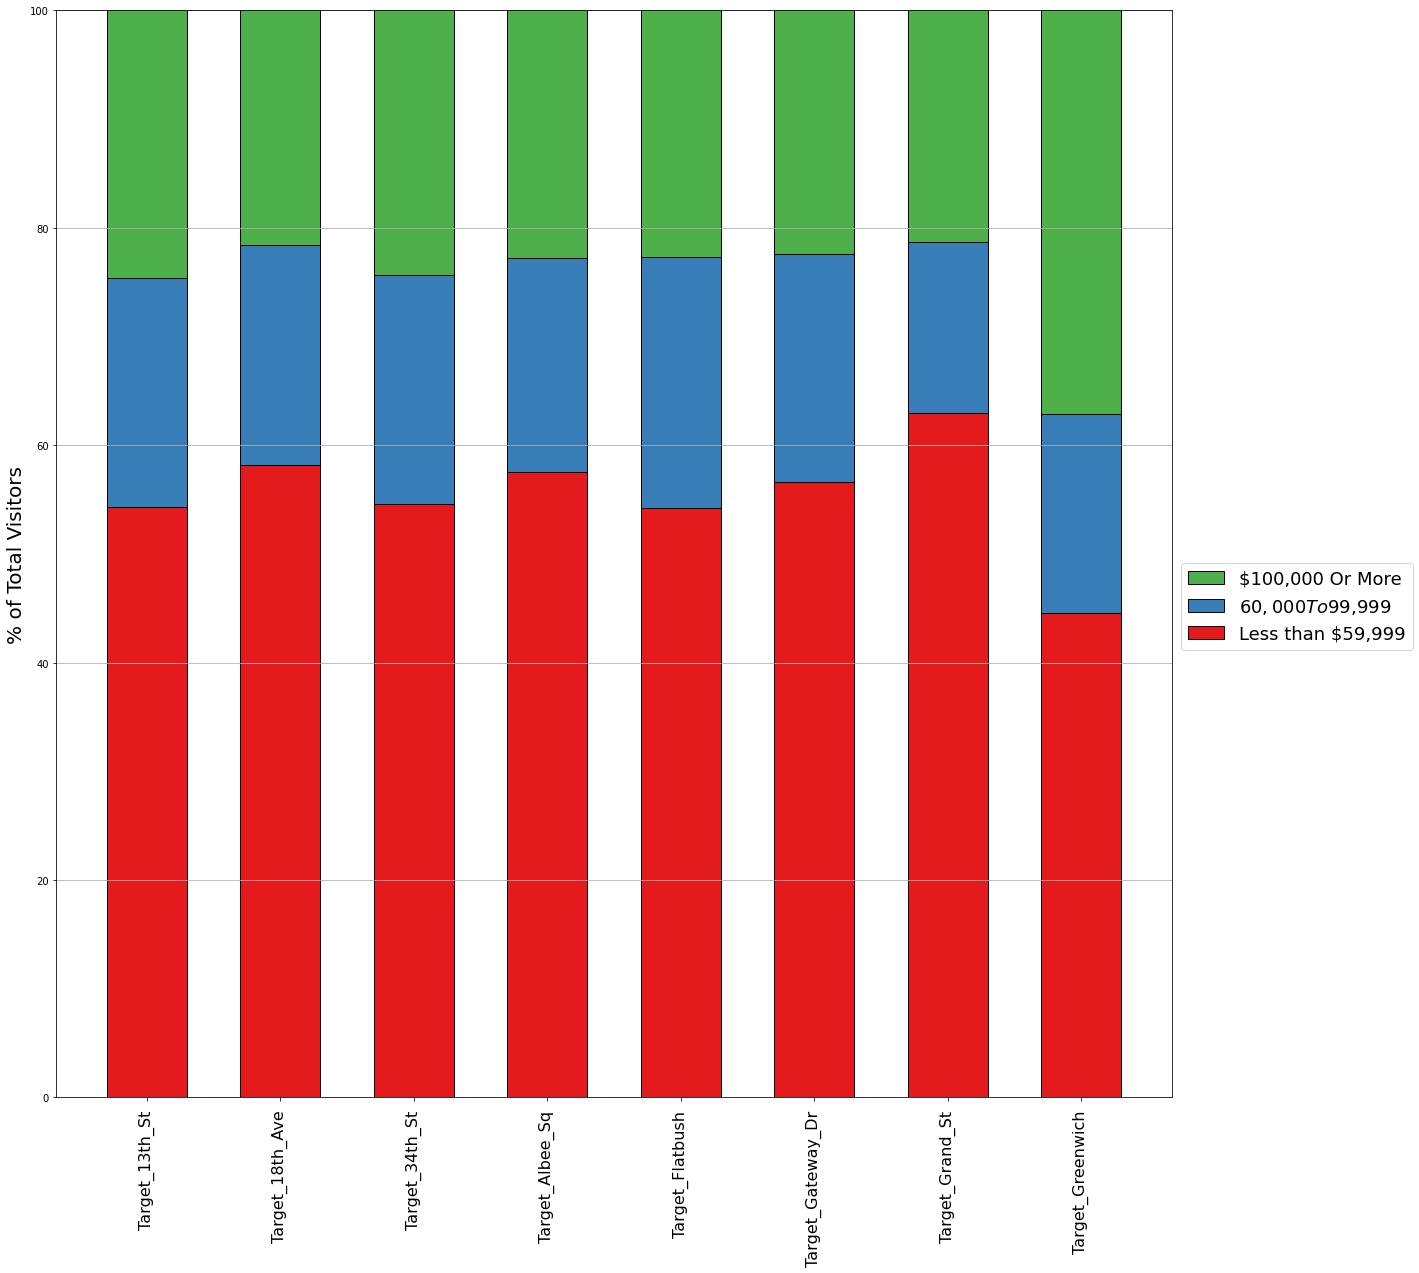

<Figure size 1440x1440 with 0 Axes>

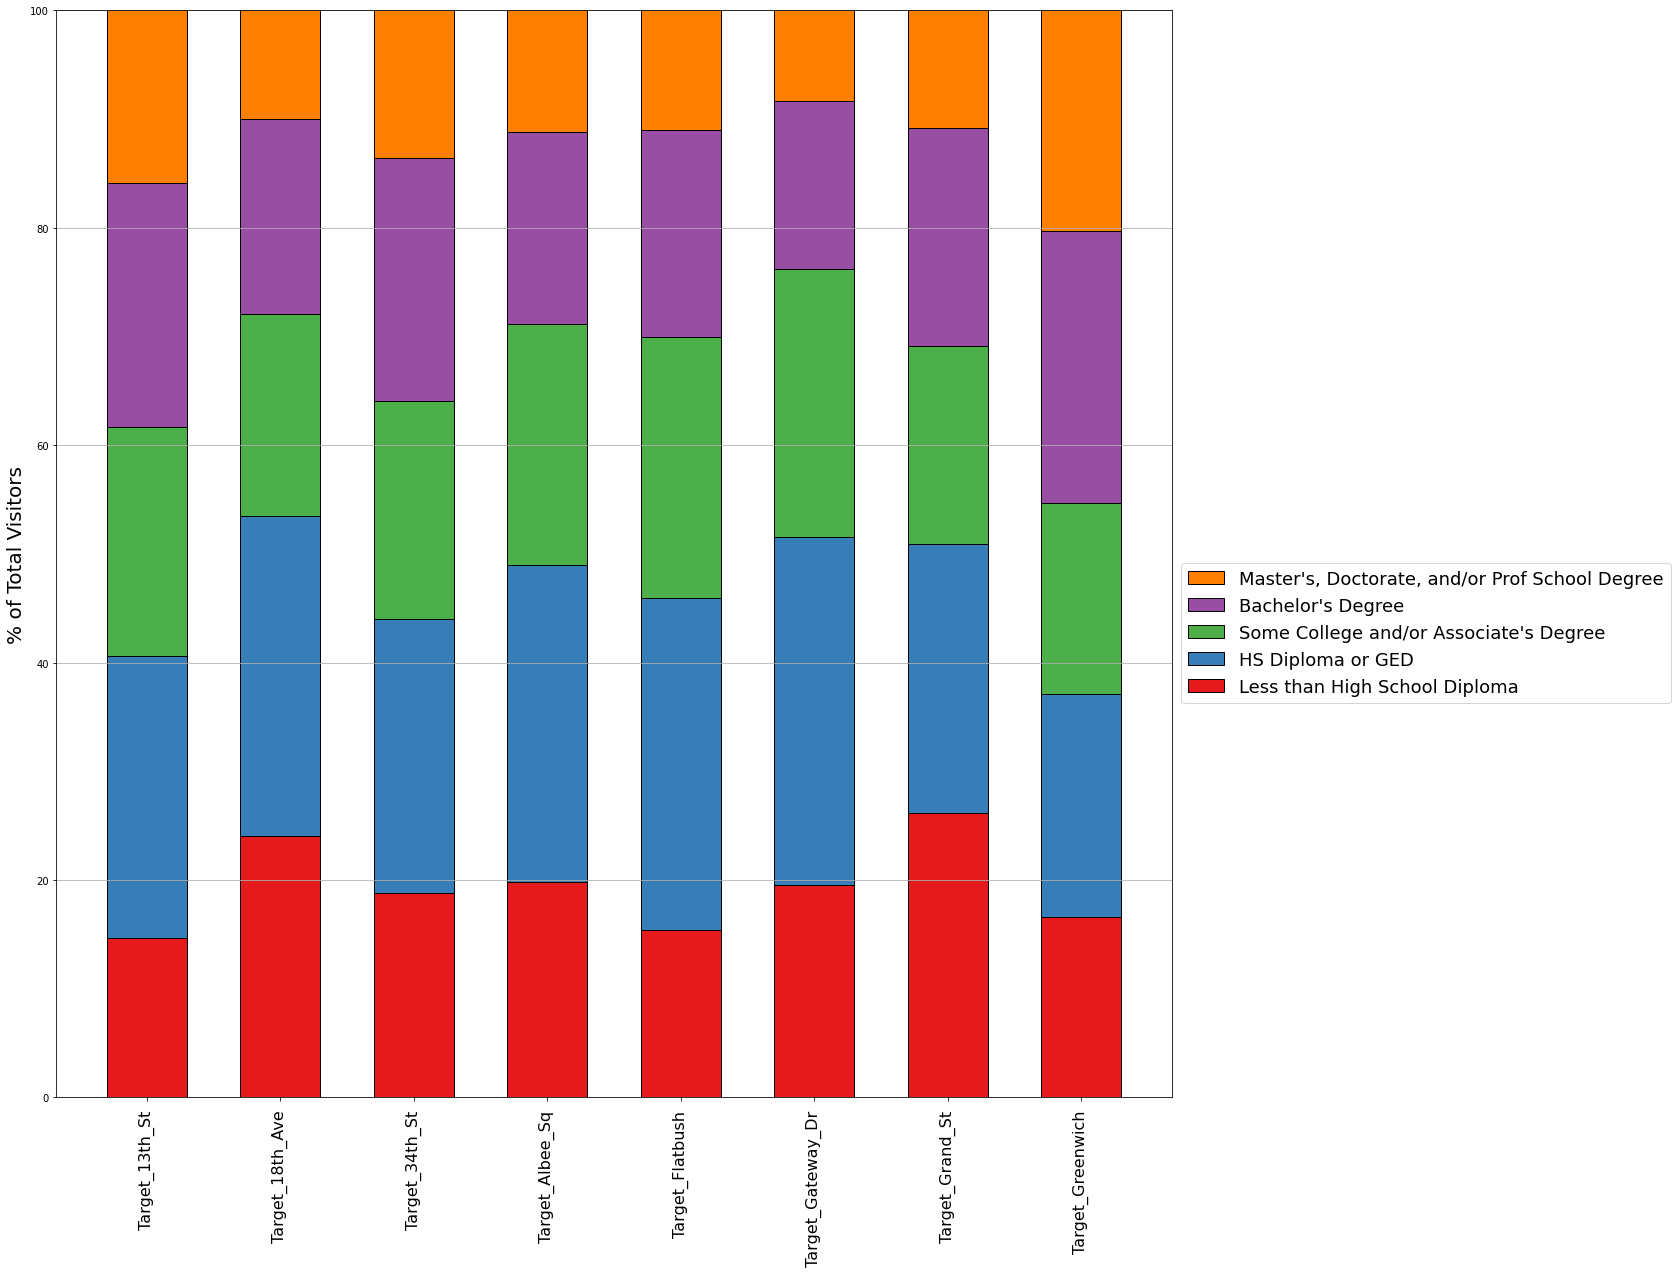

<Figure size 1440x1440 with 0 Axes>

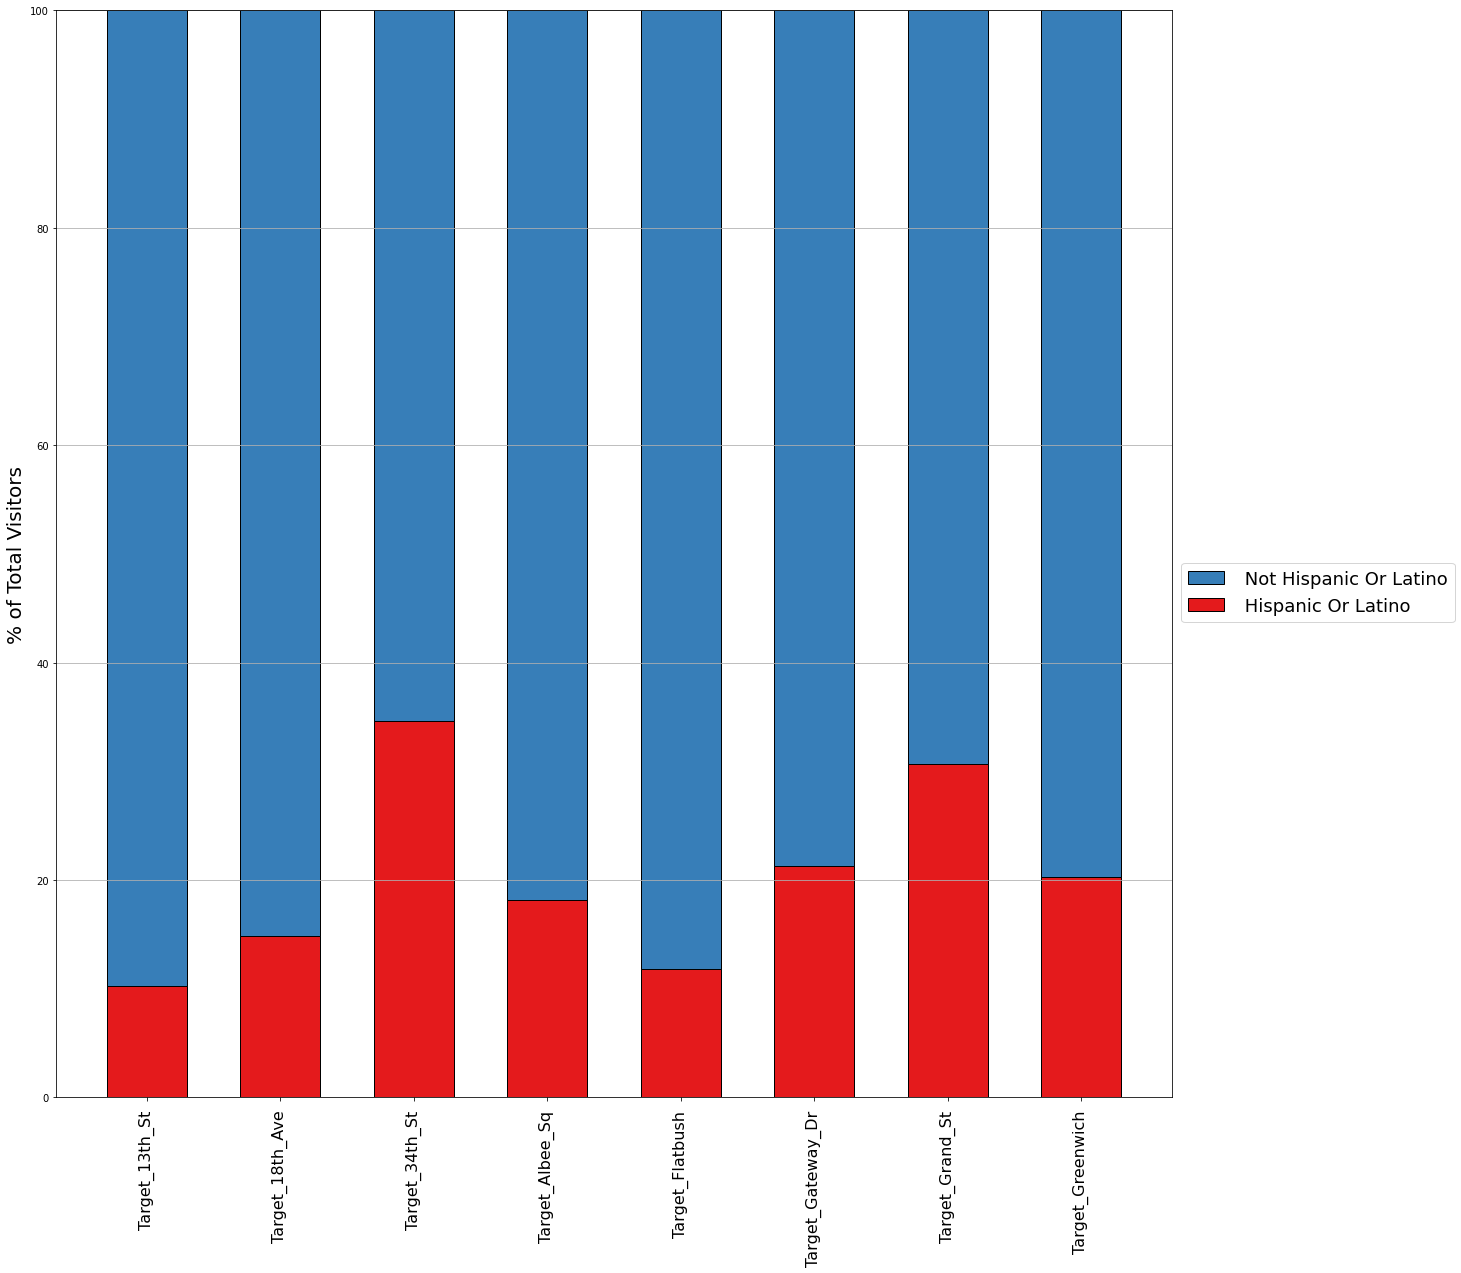

<Figure size 1440x1440 with 0 Axes>

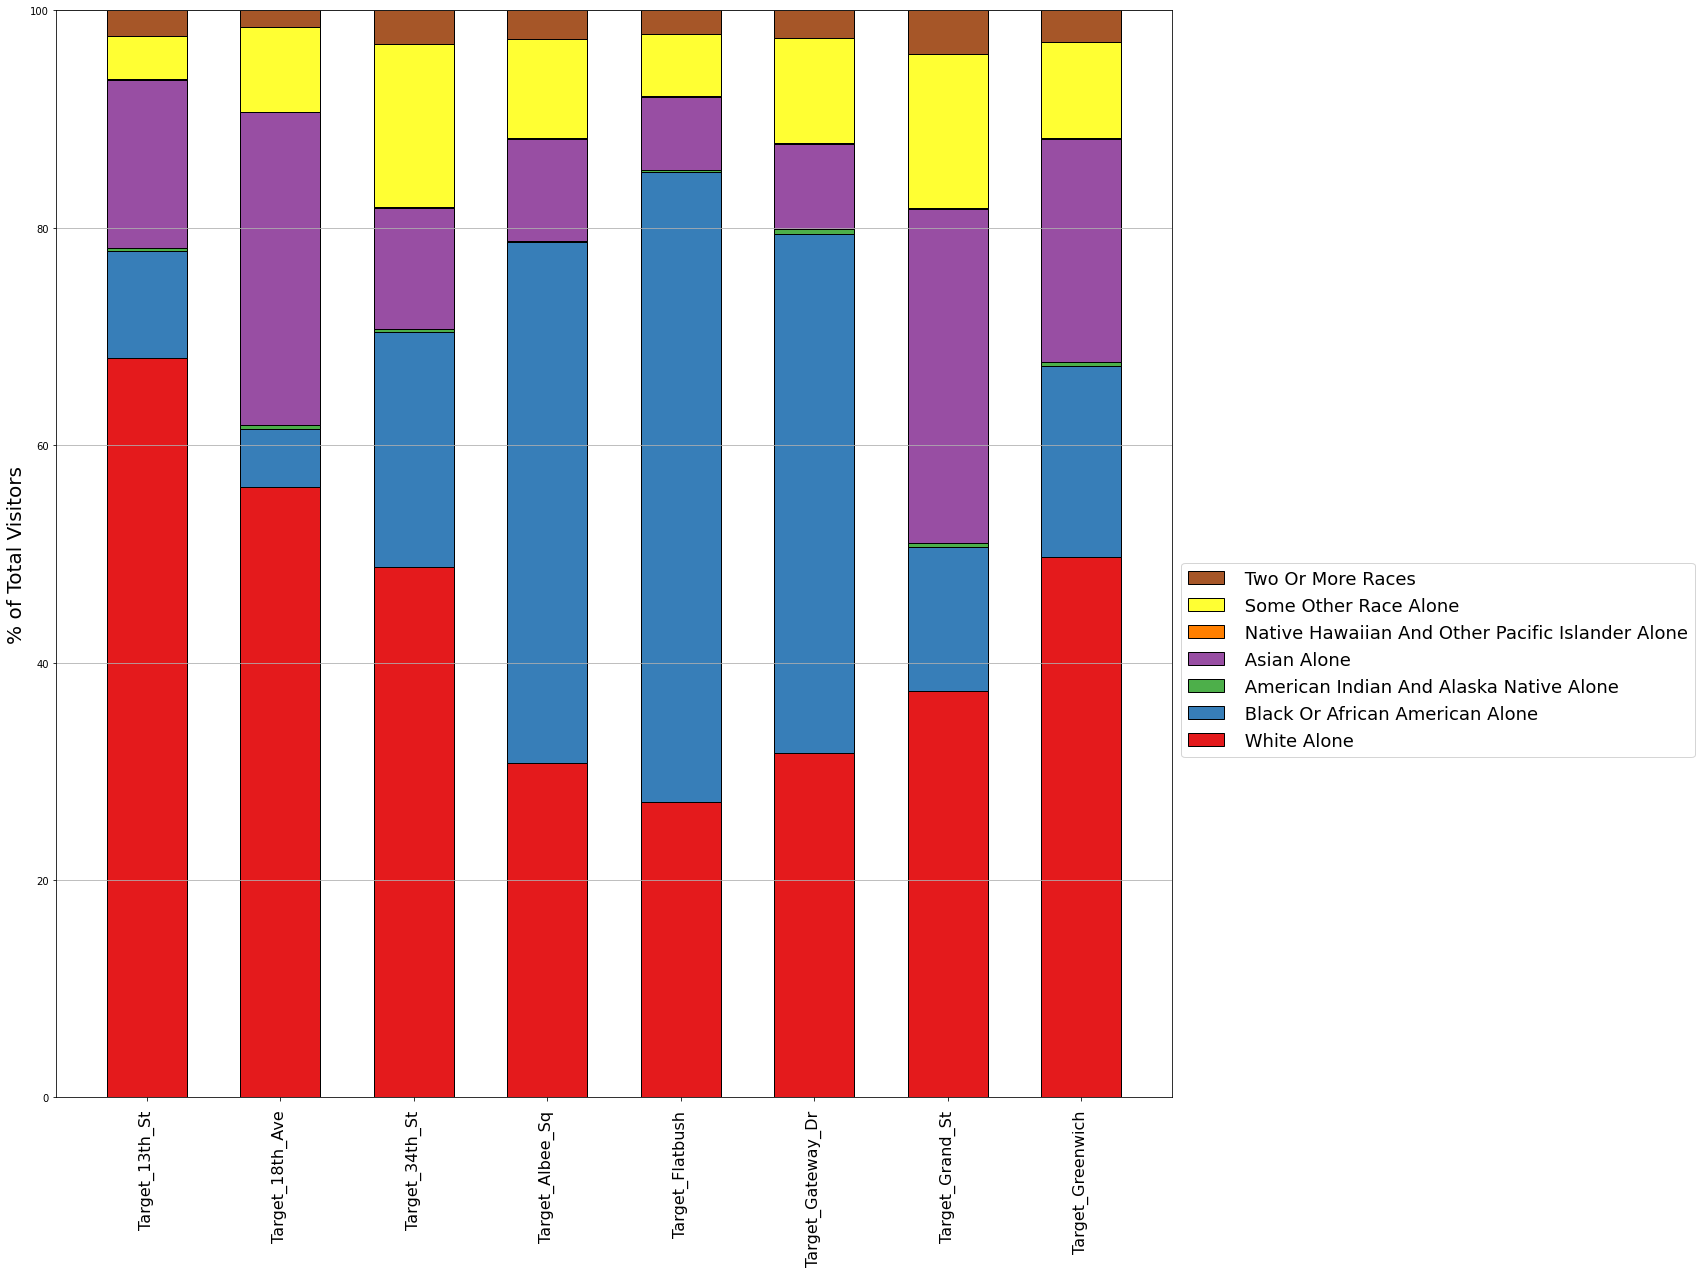

<Figure size 1440x1440 with 0 Axes>

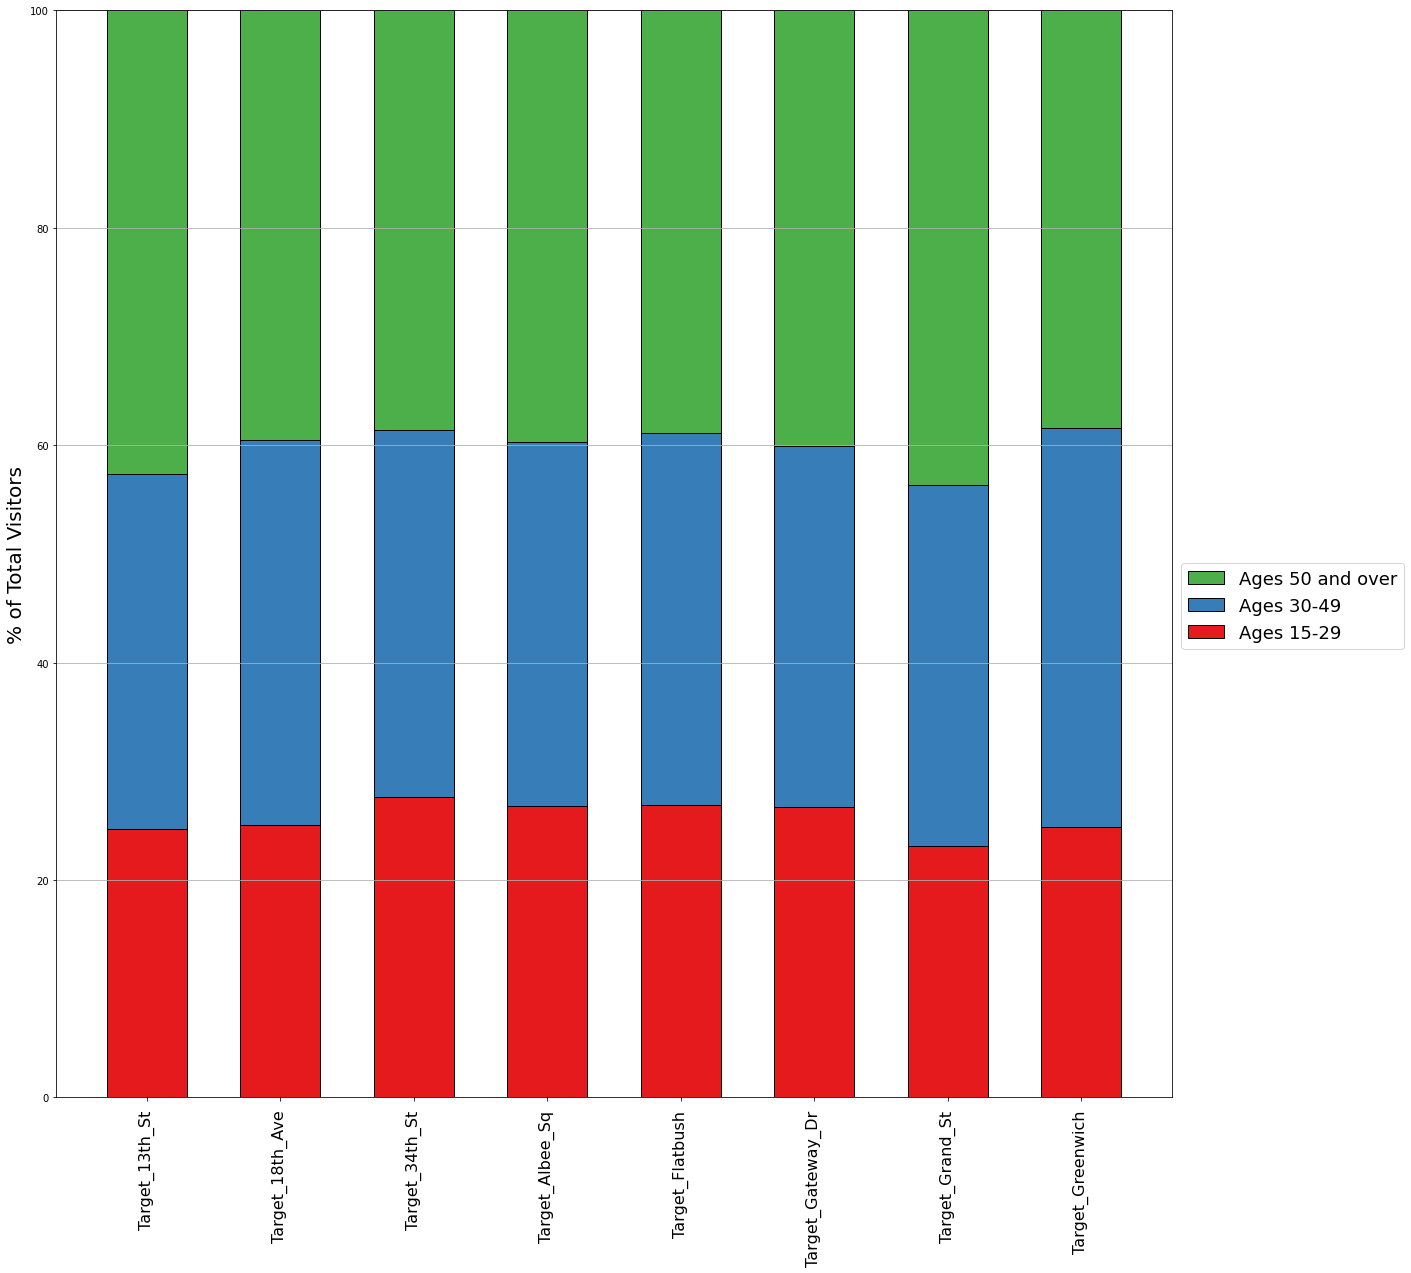

<Figure size 1440x1440 with 0 Axes>

In [ ]:
print("Figure 3")
for demo in demos_to_analyze[::-1]:
    demo_codes = dpf.get_final_table_ids(demo)
    data2plot_ = final_results_[final_results_.demo_code.isin(demo_codes)]
    dpf.make_demographics_chart(data2plot_, chart_type='stacked_bar', column_to_plot='visitor_count_POP_D_adj_rate', bar_groups='field_level_2', fig_size=[20,20])
    plt.savefig('/content/mountedDrive/My Drive/Safegraph_Data/filtered_poi_data/July_2020/Demo_Jul2020.png')

In [ ]:
pwd

'/content'

# Optional: STATISTICAL CERTAINTY ANALYSIS

When analyzing customer demographics at the national level for major brands with many locations, we are aggregating over many thousands (or 10,000s or 100,000s) of census block groups. We haven't actually calculated this yet, but this turns out to give us immense statistical power.

However, now we are going to analyze data for a single Target location in different cbgs. Intuitively, collecting data from a smaller sample size probably means we are going to be more vulnerable to statistical noise and less confident in our estimates.



# Just tell me the answer (Statistics Summary)

1. We model each individual data point as a random draw from a Poisson distribution with some unknown rate $\lambda$. 
2. When we sum together all individual data points, the sum of Poissons is a new Poisson with mean and variance equal to the sum of its components.
3. We use the Normal Approximation of a Poisson to estimate confidence intervals around our estimate of the mean.
4. We model each demographic segment independently, and we apply the post-hoc stratified re-weighting to our estimate of the mean (and its confidence interval) for each segment. Extrapolating also widens our confidence intervals, but luckily the [SafeGraph dataset is well sampled](https://blog.safegraph.com/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook), so adjustments are minor. 
5. We divide each estimate and confidence interval by total visitors to visualize data as a percent of total visitors. 


This approach allows us to incorporate rigorous confidence intervals into our visualization (we use 95% confidence intervals). 


First, let's re-plot Income Demographics for all Targets when aggregating *all* locations. 

I will use the master wrapper function `master_demo_analysis()` which will re-compute the entire analysis from scratch, this time incorporating the confidence intervals. 

In [ ]:
list(jul_20_branded.brands)

['Target_Gateway_Dr',
 'Target_Grand_St',
 'Target_Albee_Sq',
 'Target_13th_St',
 'Target_18th_Ave',
 'Target_Greenwich',
 'Target_Flatbush',
 'Target_34th_St']

In [ ]:
%%time
safegraph_place_id_whitelist =sgpid_list
brands_list = list(jul_20_branded.brands)
demographic_options = {'Sex By Age': True,
                         'Race' : True,
                         'Hispanic Or Latino Origin': True,
                         'Educational Attainment For The Population 25 Years And Over': True, 
                         'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)': True
                        }
###################
print("This will take about 60 seconds.")
demos_to_analyze = [demo for demo, to_use in demographic_options.items() if to_use]
visitors_join, final_results = dpf.master_demo_analysis(None, 
                                                    None, 
                                                    drive,
                                                    demos_to_analyze,
                                                    brands_list, 
                                                    safegraph_place_id_whitelist, 
                                                    verbose=False)


This will take about 60 seconds.


MergeError: ignored